In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9
import os
from plotnine import *
from glob import glob
from pathlib import Path
from dgp2 import *
palette = ['#D55E00', '#E69F00', '#0072B2',
                  '#009E73', '#F0E442', '#CC79A7', '#56B4E9']

In [2]:
# Fixing the number of donors and vary the number of s
# k is the total number of possible donorslog
# e denotes the number of donors
# 
DS = []
k = 12; e= 5; n = 2000; low=2; high=12; T=20; sim=100
for s in range(low, high):
#     print(s)
    Train, Test = [],[]
    for h in range(sim):
        np.random.seed(h)
        Probs = gen_Probs(e, k,s)
        matrix = make_matrix(Probs, k, T, n)
        train_loss, test_loss = fit_regression(matrix, T)
        Train.append(train_loss)
        Test.append(test_loss)
    means = np.array([np.mean(Train), np.mean(Test)])
    stds = np.array([np.std(Train), np.std(Test)])/np.sqrt(sim)
    
    d = {"S": [s]*2, "center":means, "min":abs(means-stds),"max":means+stds, "group":['Observed', 'Counterfactual']}

    DS.append(pd.DataFrame(data=d))
Data = pd.concat(DS)

/Users/claudiashi/miniforge3/envs/pytorch_x86/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 9 x 6 in image.
/Users/claudiashi/miniforge3/envs/pytorch_x86/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ../fig/increase_s_v2.pdf


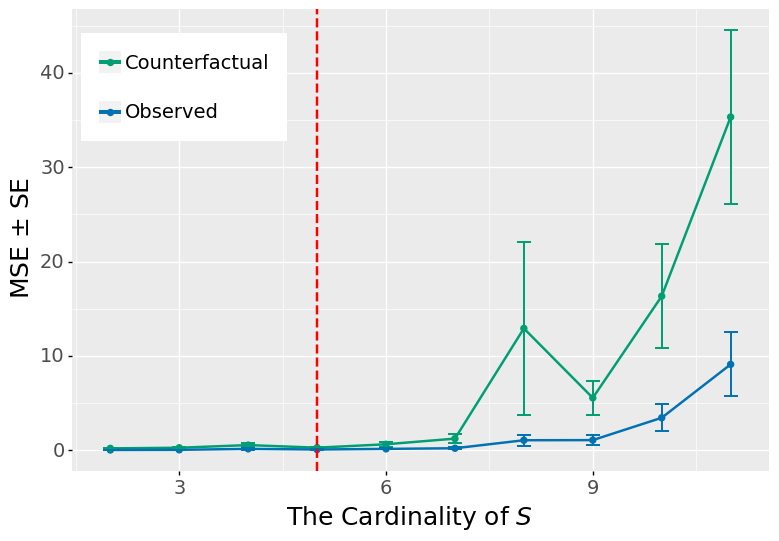

In [4]:
p = ggplot(Data,aes(x='S',y='center',group='group',colour='group')) + \
        geom_line(aes(group='group'),size=1.) + \
        geom_point(size=2) + \
        geom_errorbar(aes(ymin='min', ymax='max'), width=.2, size=0.8) +\
        labs(x=r'The Cardinality of $S$',y=r'MSE $\pm$ SE') +\
        theme(figure_size=(9,6),\
            legend_position=(0.25, 0.75),\
            #subplots_adjust={'right': 0.8},\
            text = element_text(size=14), \
            title=element_text(size=18),\
                legend_title = element_blank(),\
                    legend_entry_spacing_y = 20
            ) +\
        scale_color_manual({'Observed':palette[2],
                            'Counterfactual':palette[3] })

p += geom_vline(xintercept=e,linetype='dashed',size=1, color='red')
    

ggplot.draw(p)

ggplot.save(p, filename = '../fig/'+'increase_s_v2.pdf')